## param
$w_{min}=0.5$

$w_{max}=1.5$

$T=10$

$w(t) = w_{min} + (w_{max} - w_{min}) \frac{mod(t,T)}{T}$

In [125]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Parámetros
w_min = 0.5  # Frecuencia mínima
w_max = 1.5  # Frecuencia máxima
T = 10.0     # Período de la variación
t_max = 100  # Tiempo total de simulación

# Función de frecuencia en forma de diente de sierra
def omega(t):
    return w_min + (w_max - w_min) * ((t % T) / T)

# Sistema de ecuaciones diferenciales
def dU_dt(U, t):
    x, v = U
    return [v, -omega(t)**2 * x]

# Condiciones iniciales
U0 = [1.0, 0.0]  # x(0) = 1, v(0) = 0

# Intervalo de tiempo
t = np.linspace(0, t_max, 1000)

# Solución numérica
US = odeint(dU_dt, U0, t)


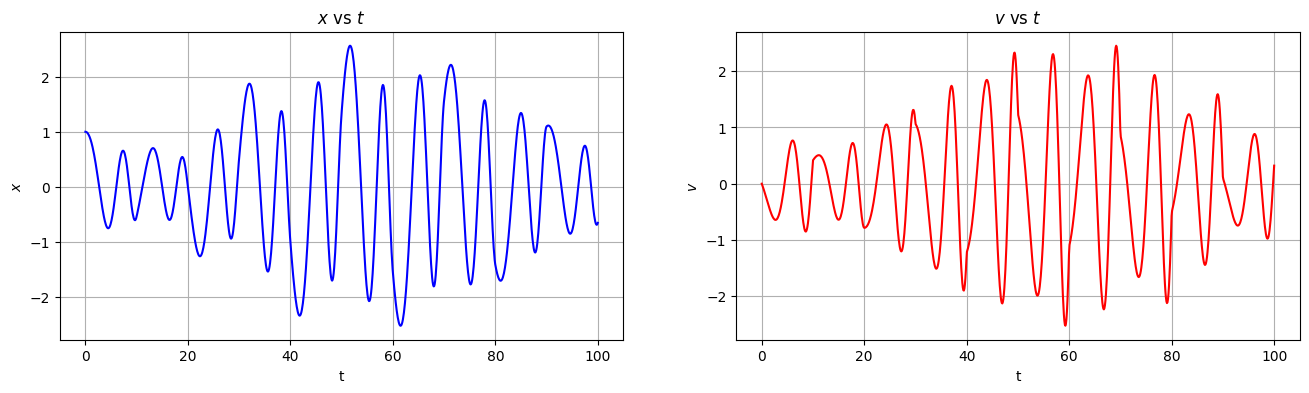

In [126]:
# Graficar resultados
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))

# Posición vs tiempo
axes[0].plot(t, US[:, 0], color='blue')
axes[0].grid()
axes[0].set_title(r'$x$ vs $t$')
axes[0].set_xlabel('t')
axes[0].set_ylabel(r'$x$')

# Velocidad vs tiempo
axes[1].plot(t, US[:, 1], color='red')
axes[1].grid()
axes[1].set_title(r'$v$ vs $t$')
axes[1].set_xlabel('t')
axes[1].set_ylabel(r'$v$')

plt.show()

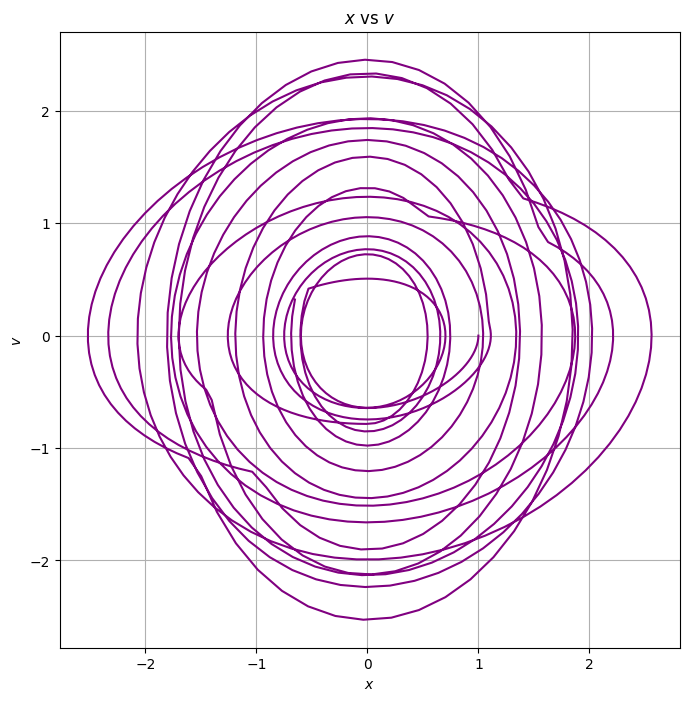

In [127]:
# Diagrama de fase
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(US[:, 0], US[:, 1], color='purple')
ax.grid()
ax.set_title(r'$x$ vs $v$')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$v$')
plt.show()

## bloch

---

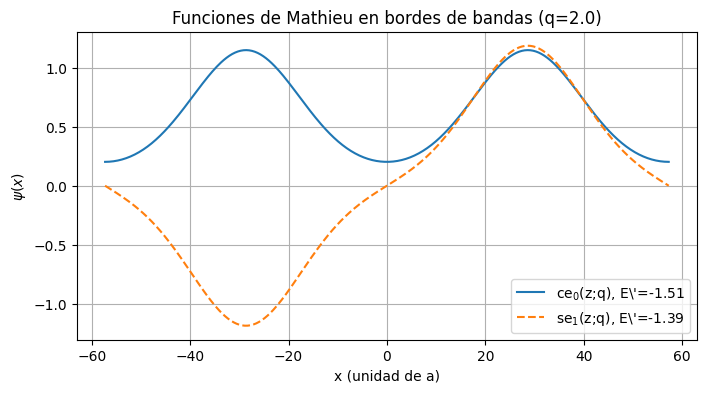

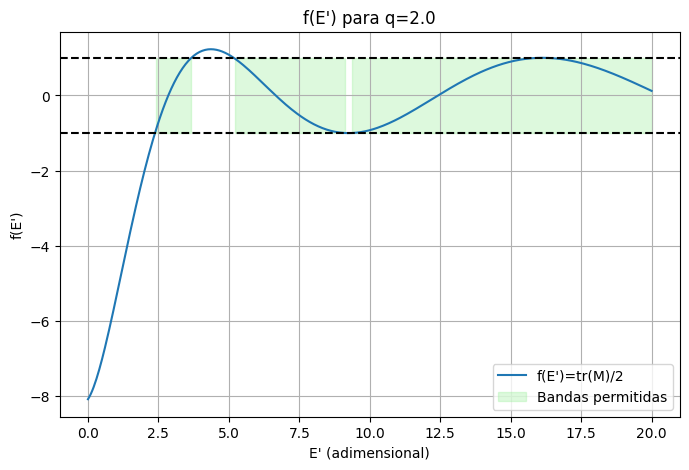

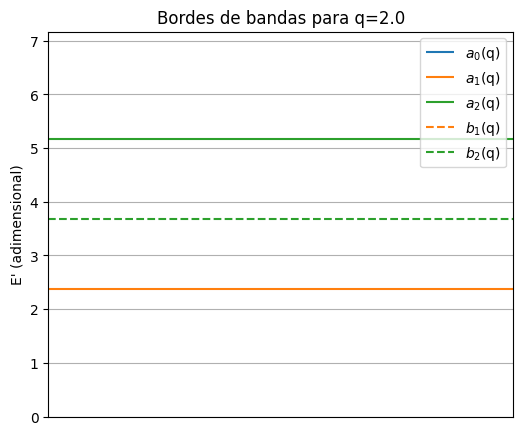

In [128]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import mathieu_a, mathieu_b, mathieu_cem, mathieu_sem
from scipy.integrate import solve_ivp

# Parámetros
q = 2.0  # Parámetro q fijo
a = 1.0  # periodo en z es pi, mapeo a x = a/pi * z

# 1) Valores característicos para r=0,1
a0 = mathieu_a(0, q)
b1 = mathieu_b(1, q)

# 2) Graficar funciones de onda en bordes de banda
z = np.linspace(-180, 180, 400)
ce0, _ = mathieu_cem(0, q, z)
se1, _ = mathieu_sem(1, q, z)

x = (a / np.pi) * z

plt.figure(figsize=(8, 4))
plt.plot(x, ce0, label=fr'ce$_0$(z;q), E\'={a0:.2f}')
plt.plot(x, se1, '--', label=fr'se$_1$(z;q), E\'={b1:.2f}')
plt.xlabel('x (unidad de a)')
plt.ylabel(r'$\psi(x)$')
plt.title(f'Funciones de Mathieu en bordes de bandas (q={q})')
plt.legend()
plt.grid(True)
plt.show()

# 3) Función f(E') = tr(M)/2 usando integración
def f_half_trace(Ep):
    def ode(z, Y):
        y, yp = Y
        return [yp, -(Ep - 2*q*np.cos(2*z))*y]
    sol1 = solve_ivp(ode, [0, np.pi], [1, 0], t_eval=[np.pi])
    sol2 = solve_ivp(ode, [0, np.pi], [0, 1], t_eval=[np.pi])
    y1p, y2pp = sol1.y[0,0], sol2.y[1,0]
    return 0.5*(y1p + y2pp)

E_vals = np.linspace(0, 20, 400)
f_vals = np.array([f_half_trace(Ep) for Ep in E_vals])

# 4) Graficar f(E') vs E'
plt.figure(figsize=(8,5))
plt.plot(E_vals, f_vals, label='f(E\')=tr(M)/2')
plt.axhline(1, color='k', linestyle='--')
plt.axhline(-1, color='k', linestyle='--')
plt.fill_between(E_vals, -1, 1, where=np.abs(f_vals)<=1, color='lightgreen', alpha=0.3,
                 label='Bandas permitidas')
plt.xlabel('E\' (adimensional)')
plt.ylabel('f(E\')')
plt.title(f'f(E\') para q={q}')
plt.legend()
plt.grid(True)
plt.show()

# 5) Mostrar bandas usando a_r(q), b_r(q)
r_max = 2
a_r = [mathieu_a(r, q) for r in range(r_max+1)]
b_r = [mathieu_b(r, q) for r in range(1, r_max+1)]

# Graficar bandas como intervalos
plt.figure(figsize=(6,5))
for r in range(r_max+1):
    plt.hlines(a_r[r], 0, 1, colors=f'C{r}', label=fr'$a_{{{r}}}$(q)')
for r in range(1, r_max+1):
    plt.hlines(b_r[r-1], 0, 1, linestyles='--', colors=f'C{r}', label=fr'$b_{{{r}}}$(q)')
plt.ylim(0, max(a_r[-1], b_r[-1])+2)
plt.xlim(0,1)
plt.ylabel("E' (adimensional)")
plt.xticks([])
plt.title(f"Bordes de bandas para q={q}")
plt.legend()
plt.grid(True)
plt.show()


Escala adimensional: E' = E_phys/E0 = 10.1321,  q_demo = -2.02642


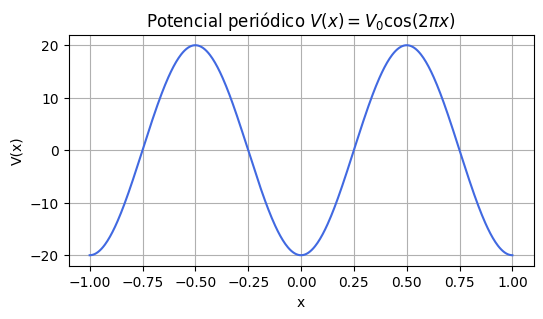

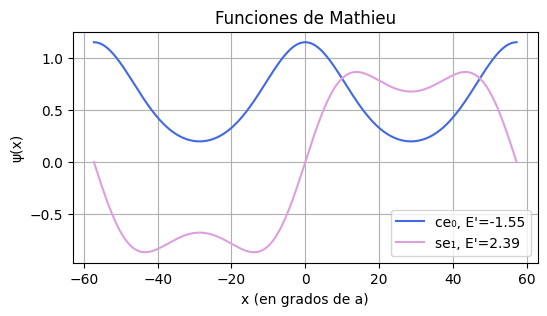

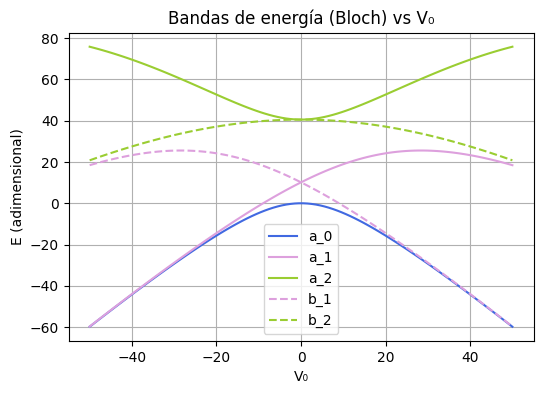

In [143]:
"""
Analogía del oscilador paramétrico y el movimiento de una partícula cuántica en 1D sometida a un potencial periódico
===============================================================================================================

Este script demuestra cómo la ecuación de Schrödinger con un potencial V(x)=V0·cos(2πx/a)
se convierte en la ecuación de Mathieu:

    y''(z) + [E' - 2 q cos(2 z)] y(z) = 0

que es análoga al oscilador paramétrico clásico con frecuencia:
    Ω^2(t) = Ω0^2 + ΔΩ^2 cos(ω t)

En la parte cuántica, E' y q juegan el rol de parámetros que modulan la dinámica,
generando bandas de energía (Bloch) en lugar de resonancias paramétricas.

Secciones del código:
1) Parámetros físicos y escalas adimensionales
2) Visualización del potencial y funciones de Mathieu en bordes de banda
3) Exploración de bandas energéticas (valores característicos a_r, b_r)
4) Representación de bandas en función de V0
"""

import numpy as np
import matplotlib.pyplot as plt
from scipy.special import mathieu_a, mathieu_b, mathieu_cem, mathieu_sem
color_mapping_a = {0: "royalblue", 1: "plum", 2: "yellowgreen", 3: "rebeccapurple", 4: "hotpink"}
#ué tal se ve yellowgreen, plum y tal vez rebeccapurple o hotpink

# ----------------------------------------------------------------------------
# 1) PARÁMETROS FÍSICOS Y ESCALAS ADIMENSIONALES
# ----------------------------------------------------------------------------
hbar = 1.0       # ℏ = 1 (unidad natural)
m    = 1.0       # masa efectiva = 1
a    = 1.0       # periodo (longitud)
E_phys = 50.0    # energía física de referencia

# Conversión a unidades de Mathieu: E' y q
E_unit = (2*m*E_phys/hbar**2)*(a/np.pi)**2
V0_demo = -20.0
q_demo  = (m*V0_demo/hbar**2)*(a/np.pi)**2

print(f"Escala adimensional: E' = E_phys/E0 = {E_unit:2g},  q_demo = {q_demo:2g}")

# ----------------------------------------------------------------------------
# 2) VISUALIZACIÓN DEL POTENCIAL Y FUNCIONES DE MATHIEU EN BORDES DE BANDA
# ----------------------------------------------------------------------------
# Potencial periódico V(x) = V0 cos(2πx/a)
def V(x, V0=V0_demo, a=a):
    return V0 * np.cos(2*np.pi*x/a)

# Graficar V(x)
x_plot = np.linspace(-a, a, 500)
plt.figure(figsize=(6,3))
plt.plot(x_plot, V(x_plot), color = color_mapping_a[0])
plt.title("Potencial periódico $V(x)=V_0\\cos(2\\pi x)$")
plt.xlabel("x")
plt.ylabel("V(x)")
plt.grid(True)
plt.show()

# Bordes de primera banda: E'=a_0(q), b_1(q)

Eprime_a0 = mathieu_a(0, q_demo)
Eprime_b1 = mathieu_b(1, q_demo)
z = np.linspace(-180, 180, 400)
ce0, _ = mathieu_cem(0, q_demo, z)
se1, _ = mathieu_sem(1, q_demo, z)
x = (a/np.pi) * z

plt.figure(figsize=(6,3))
plt.plot(x, ce0, label=f"ce₀, E'={Eprime_a0:.2f}", color = color_mapping_a[0])
plt.plot(x, se1, label=f"se₁, E'={Eprime_b1:.2f}", color = color_mapping_a[1])
plt.title("Funciones de Mathieu")
plt.xlabel("x (en grados de a)")
plt.ylabel("ψ(x)")
plt.legend()
plt.grid(True)
plt.show()

# ----------------------------------------------------------------------------
# 3) EXPLORACIÓN DE BANDAS ENERGÉTICAS
# ----------------------------------------------------------------------------
V0_vals = np.linspace(-E_phys, E_phys, 100)
r_max = 2
bands_a = []
bands_b = []

for V0 in V0_vals:
    q = (m*V0/hbar**2)*(a/np.pi)**2
    a_r = [mathieu_a(r, q) for r in range(r_max+1)]
    b_r = [mathieu_b(r, q) for r in range(1, r_max+1)]
    bands_a.append(a_r)
    bands_b.append([np.nan]+b_r)

bands_a = np.array(bands_a).T
bands_b = np.array(bands_b).T

# ----------------------------------------------------------------------------
# 4) REPRESENTACIÓN DE LAS BANDAS DE BLOCH
# ----------------------------------------------------------------------------
plt.figure(figsize=(6,4))
for r in range(r_max+1):
    plt.plot(V0_vals, bands_a[r]*E_unit, label=f"a_{r}", color=color_mapping_a[r])
for r in range(1, r_max+1):
    plt.plot(V0_vals, bands_b[r]*E_unit, '--', label=f"b_{r}", color=color_mapping_a[r])
plt.title("Bandas de energía (Bloch) vs V₀")
plt.xlabel("V₀")
plt.ylabel("E (adimensional)")
plt.legend()
plt.grid(True)
plt.show()


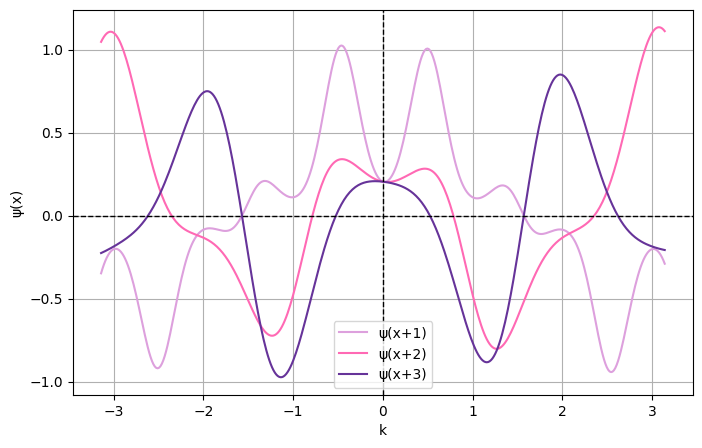

In [140]:
def psi(x, a = 1, q = q_demo, k = 0):
    return mathieu_cem(0, q, (np.pi*(x-a)/a))[0]*np.exp(1j *k*a)

color_mapping_a = {0: "royalblue", 1: "plum", 2: "hotpink", 3: "rebeccapurple", 4: "hotpink"}

k = np.linspace(-np.pi, np.pi, 400)
plt.figure(figsize=(8,5))
for a in [ 1, 2, 3 ]:
    plt.plot(k, psi(z, a, 2, k), label=f"ψ(x+{a})", color=color_mapping_a[a])
plt.axhline(0, color='k', linestyle='--', linewidth=1)
plt.axvline(0, color='k', linestyle='--', linewidth=1)
plt.xlabel("k")
plt.ylabel("ψ(x)")
plt.legend()
plt.grid(True)
plt.show()


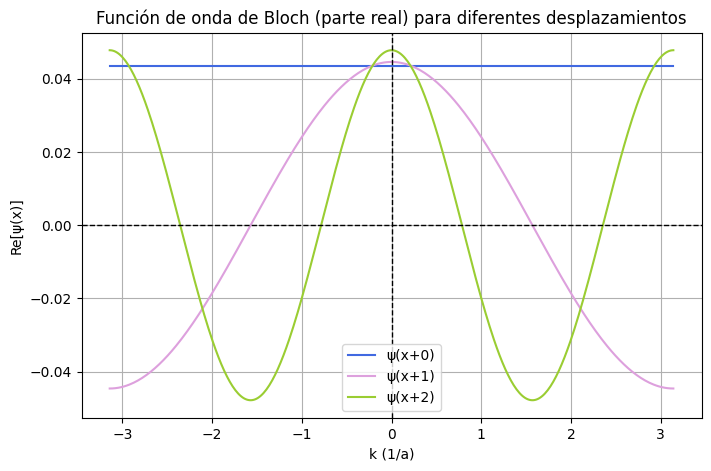

In [144]:


# Definir la función de onda de Bloch
def psi(x, k, q, a=1):
    z = np.pi * x / a  # Mapeo correcto de x a z
    ce0, _ = mathieu_cem(0, q, z)  # Solución par de Mathieu
    return ce0 * np.exp(1j * k * x)  # Fase de Bloch correcta

# Generar datos
x = 0  # Evaluar en un punto fijo (por ejemplo, x=0)
k = np.linspace(-np.pi, np.pi, 400)  

# Calcular psi para diferentes desplazamientos
a=1
plt.figure(figsize=(8, 5))
for shift in [0, a, 2*a]:  # Desplazamientos x+a, x+2a, etc.
    psi_values = [psi(x + shift, k_val, q, a).real for k_val in k]  # Tomar parte real
    plt.plot(k, psi_values, label=f'ψ(x+{shift})', color=color_mapping_a[int(shift/a)])

plt.axhline(0, color='k', linestyle='--', linewidth=1)
plt.axvline(0, color='k', linestyle='--', linewidth=1)
plt.xlabel('k (1/a)')
plt.ylabel('Re[ψ(x)]')
plt.title('Función de onda de Bloch (parte real) para diferentes desplazamientos')
plt.legend()
plt.grid(True)
plt.show()